# Final Preparation of Covariates

In [1]:
rm(list=ls())
options(warn = -1)

In [2]:
suppressMessages(library(ggplot2))

In [3]:
folder = getwd()
weather <- read.csv(file.path(dirname(folder), "data/weather/observed_data_2015_2023/final/merged/weather.csv"))
capacity <-read.csv(file.path(dirname(folder), "data/installed_capacity/final/installed_capacity.csv"))

In [4]:
head(weather)

,date,pressure_sl_m_castelobranco,temperature_c_castelobranco,windspeed_100m_kmh_castelobranco,pressure_sl_m_evora,temperature_c_evora,windspeed_100m_kmh_evora,pressure_sl_m_faro,temperature_c_faro,windspeed_100m_kmh_faro,⋯,windspeed_100m_kmh_lisbona,pressure_sl_m_porto,temperature_c_porto,windspeed_100m_kmh_porto,pressure_sl_m_santarem,temperature_c_santarem,windspeed_100m_kmh_santarem,pressure_sl_m_vilareal,temperature_c_vilareal,windspeed_100m_kmh_vilareal
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015-01-01,1034.829,5.375000,9.033333,1034.096,6.975000,16.312500,1033.300,11.67083,15.137500,⋯,16.504167,1035.263,6.983333,9.800000,1034.633,5.766667,12.82500,1035.917,5.383333,10.625000
2,2015-01-02,1037.850,5.887500,9.845833,1037.075,7.766667,18.337500,1036.329,11.75833,10.841667,⋯,14.650000,1037.750,7.200000,6.508333,1037.579,6.170833,12.19583,1038.154,5.800000,9.016667
3,2015-01-03,1037.904,7.095833,9.170833,1037.208,7.945833,14.325000,1036.296,12.68750,13.783333,⋯,14.004167,1038.054,7.495833,7.316667,1037.808,6.066667,13.56667,1038.112,6.100000,4.862500
4,2015-01-04,1033.575,7.141667,7.362500,1032.933,8.170833,13.058333,1032.421,13.07500,7.754167,⋯,14.204167,1033.846,7.362500,5.916667,1033.500,6.237500,10.46250,1034.150,6.425000,9.487500
5,2015-01-05,1029.350,6.912500,7.854167,1029.450,7.320833,9.729167,1029.429,12.88750,6.604167,⋯,10.366667,1029.625,8.025000,6.895833,1029.783,5.237500,9.31250,1029.608,5.175000,7.145833
6,2015-01-06,1028.588,3.483333,6.308333,1028.629,5.891667,11.925000,1028.342,10.56250,15.458333,⋯,7.158333,1028.492,8.291667,6.933333,1028.458,6.512500,8.31250,1029.000,3.941667,5.208333


In [5]:
head(capacity)

,date,smoothed_capacity
,<chr>,<dbl>
1,2015-01-01,4486
2,2015-01-02,4486
3,2015-01-03,4486
4,2015-01-04,4486
5,2015-01-05,4486
6,2015-01-06,4486


In [6]:
covariates <- merge(weather, capacity, by = "date")

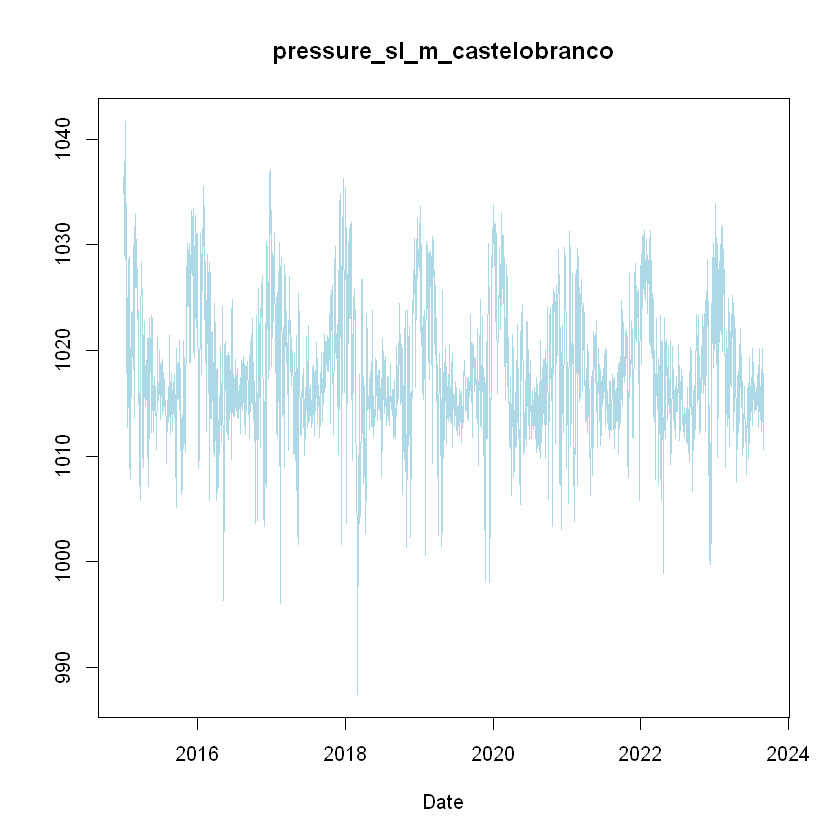

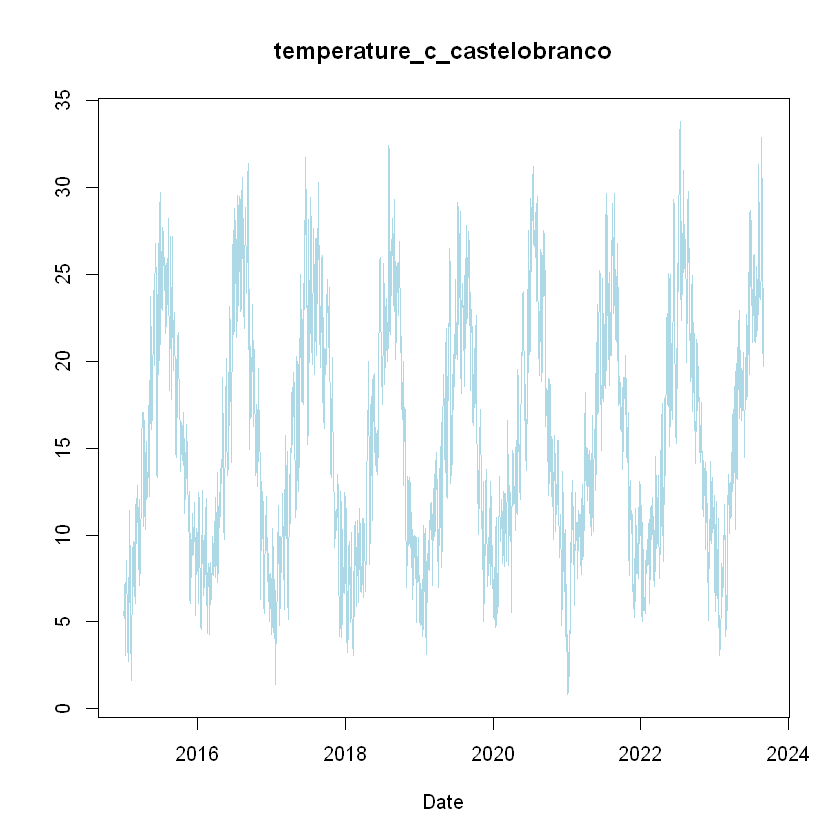

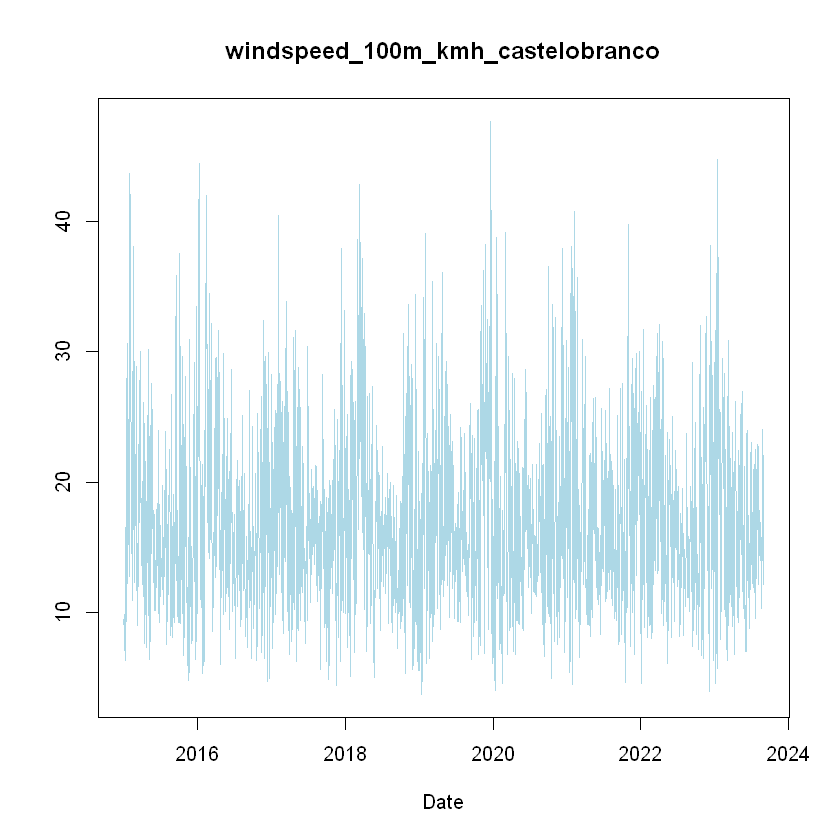

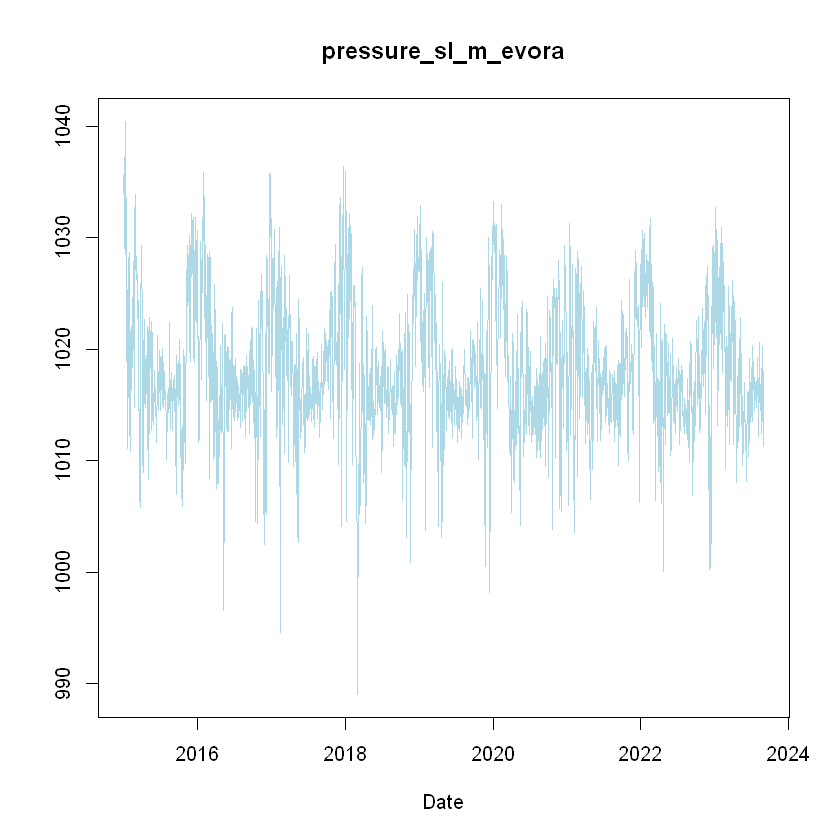

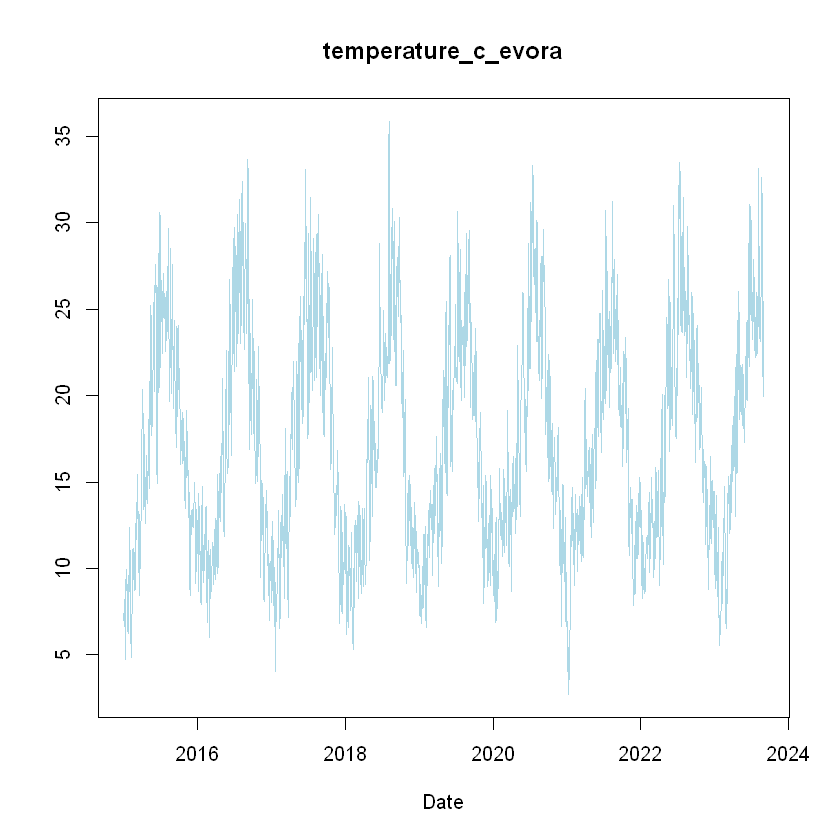

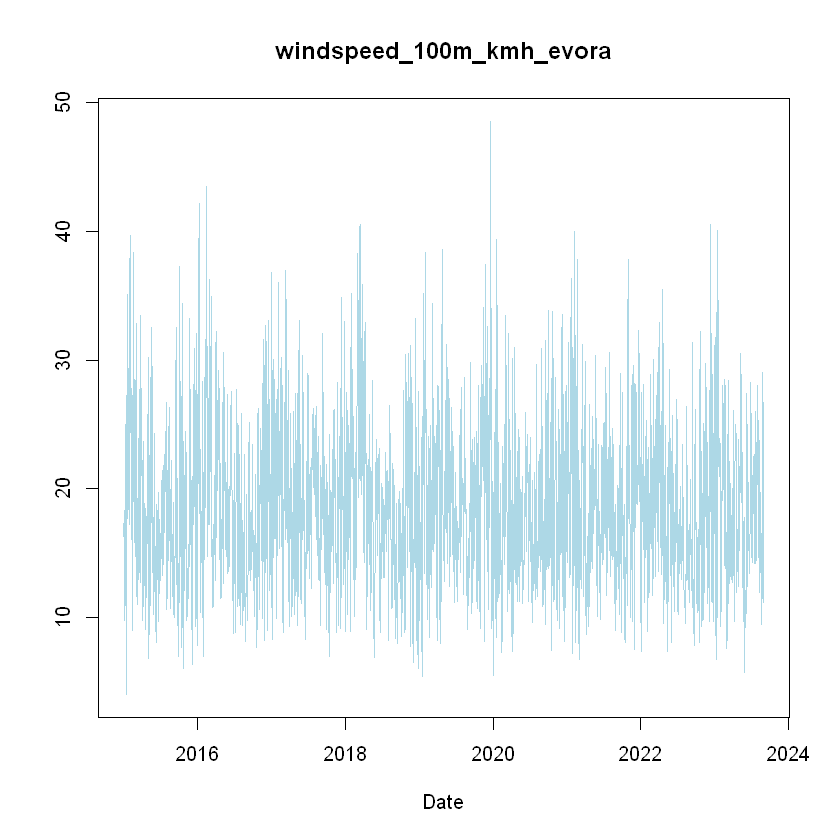

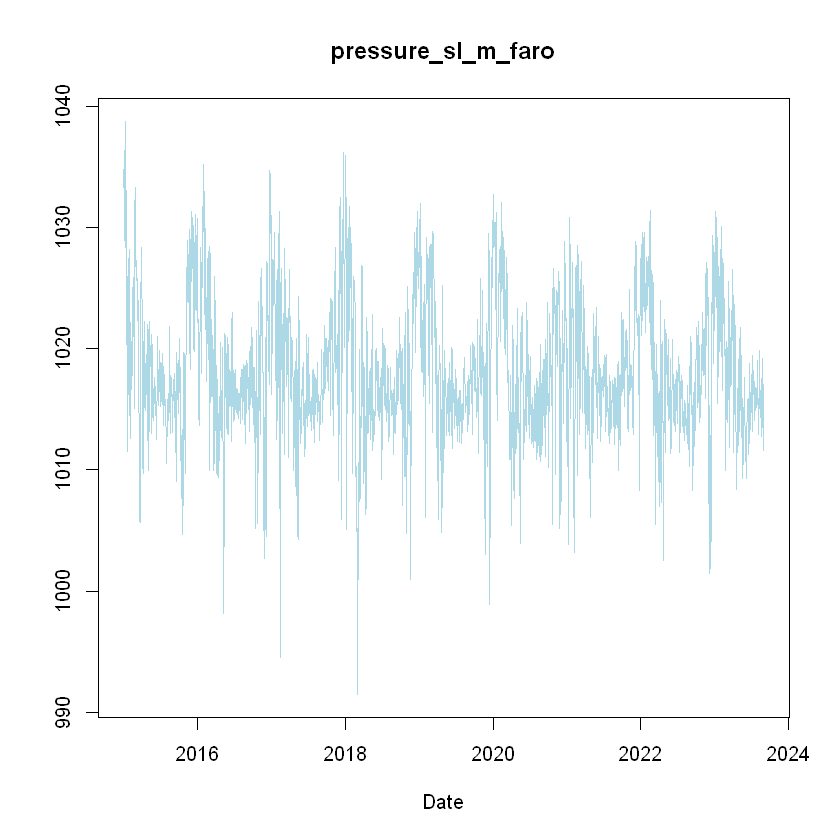

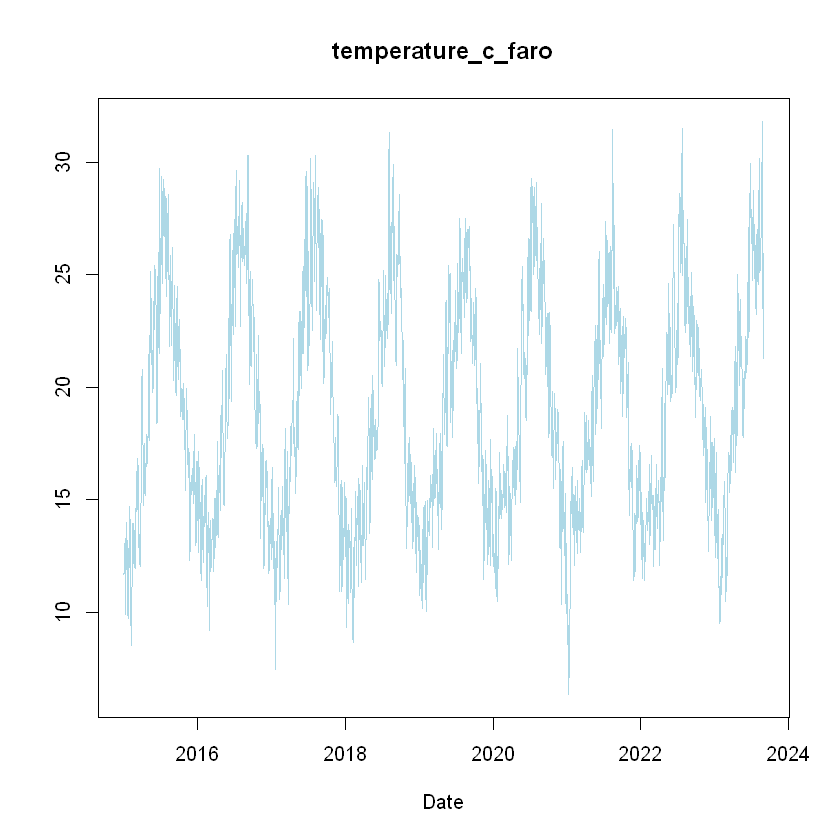

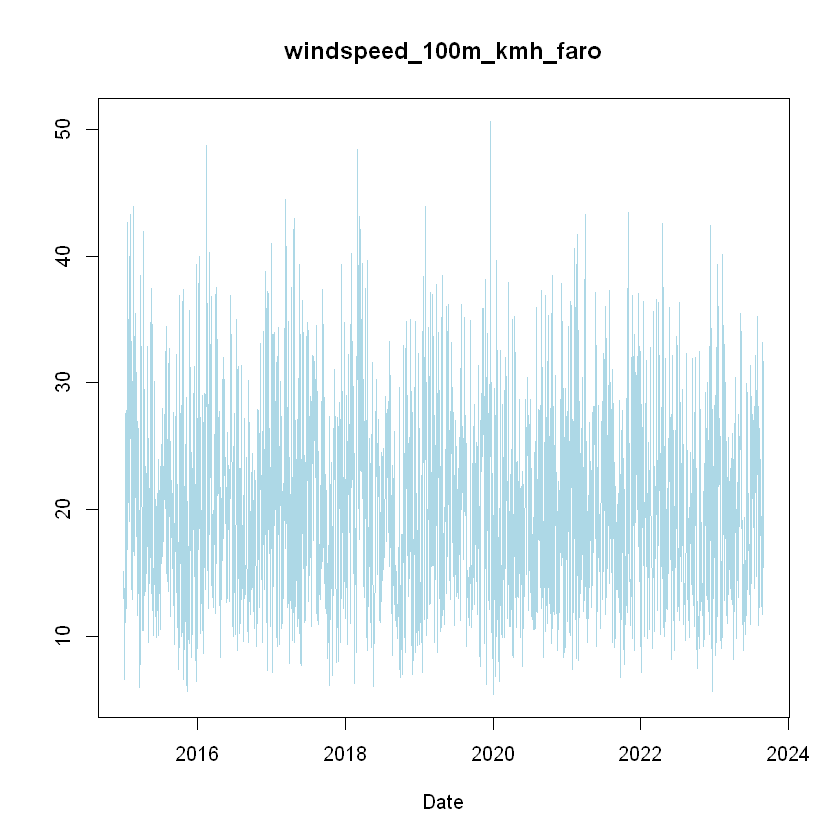

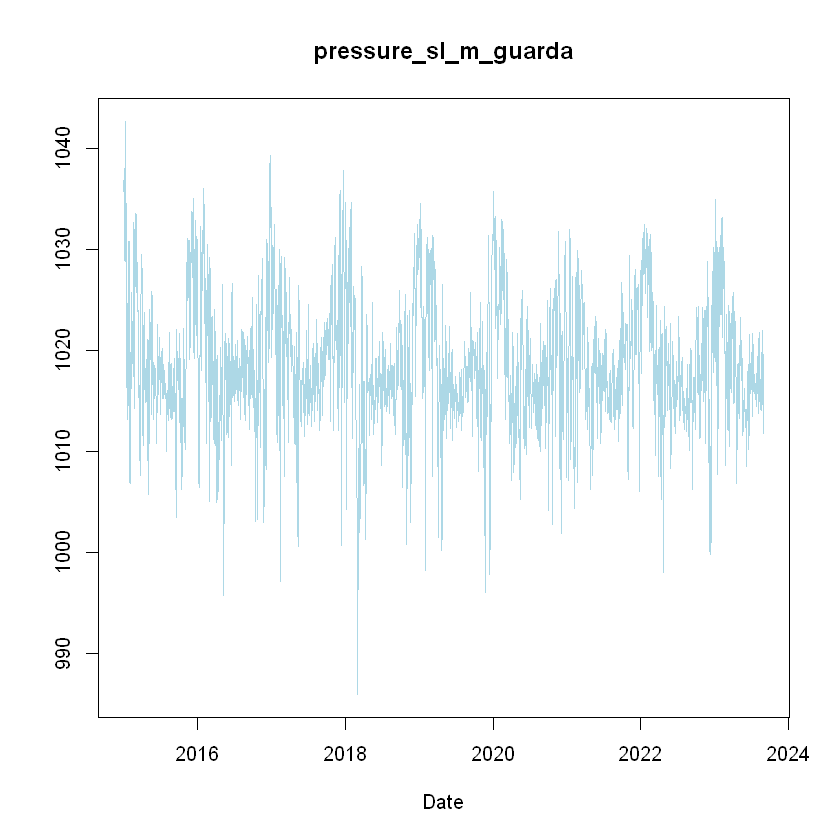

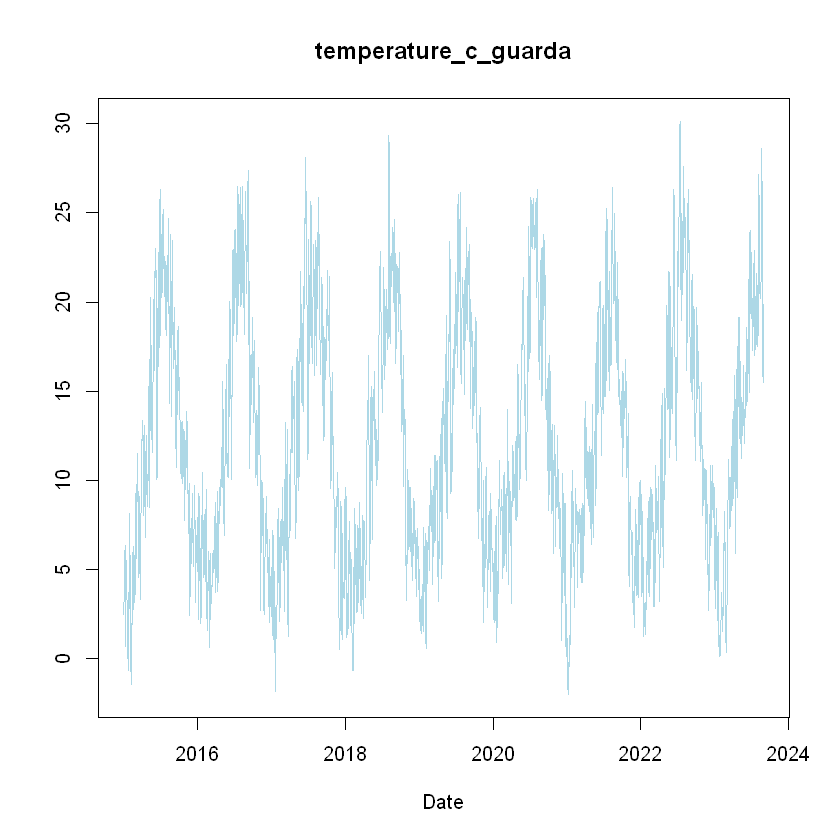

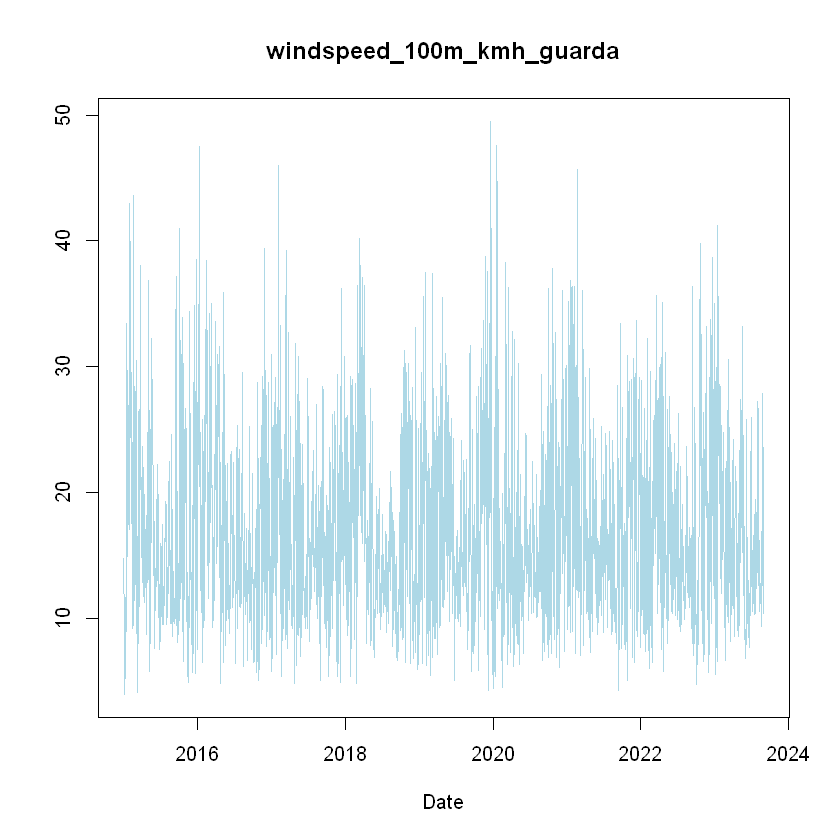

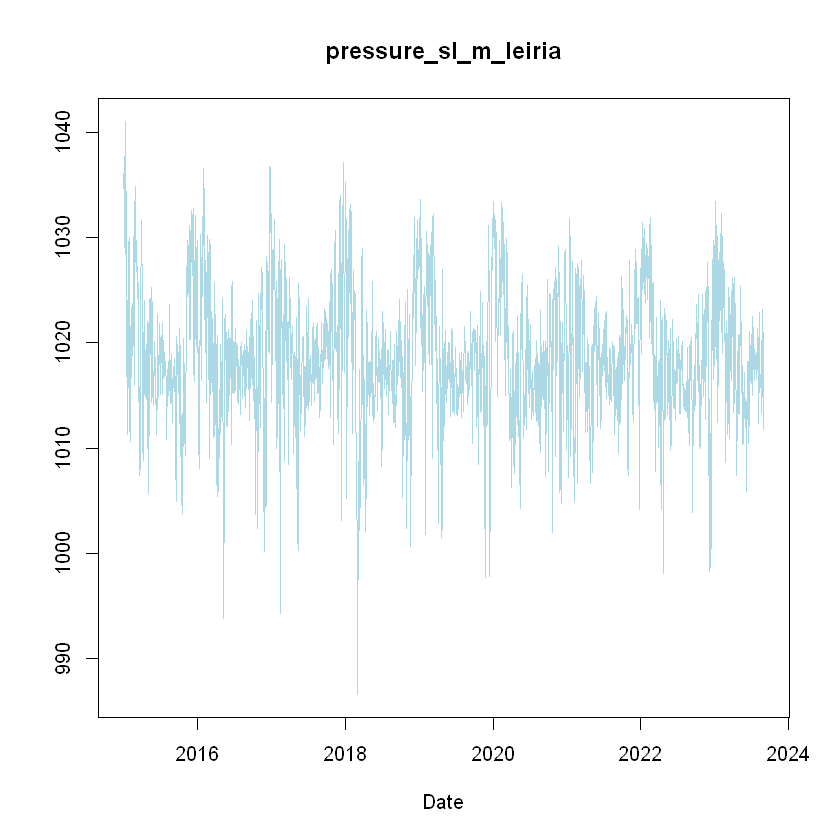

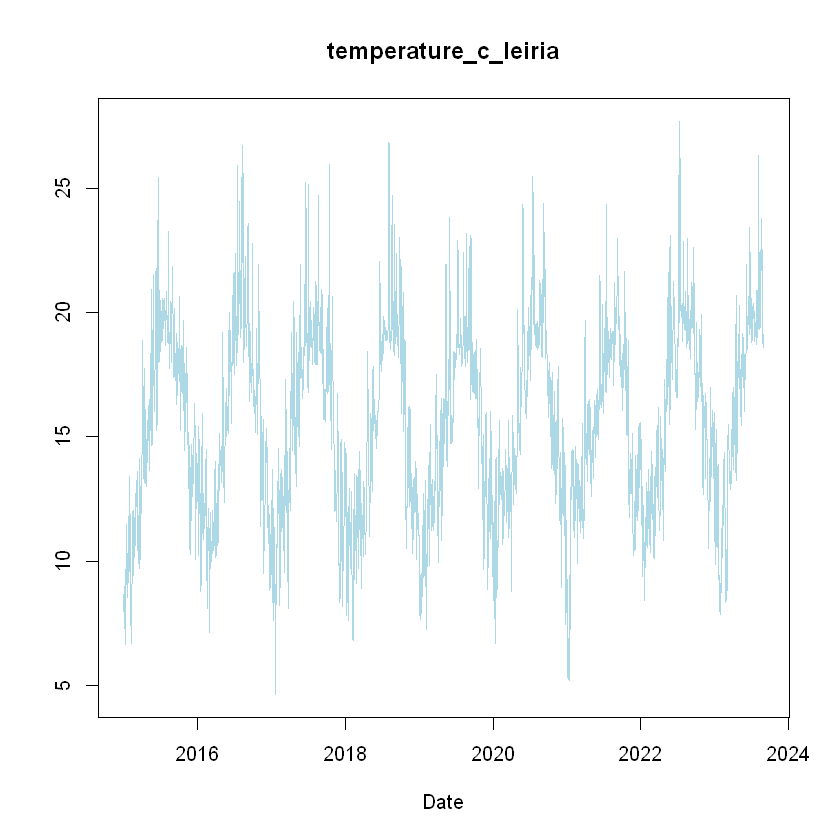

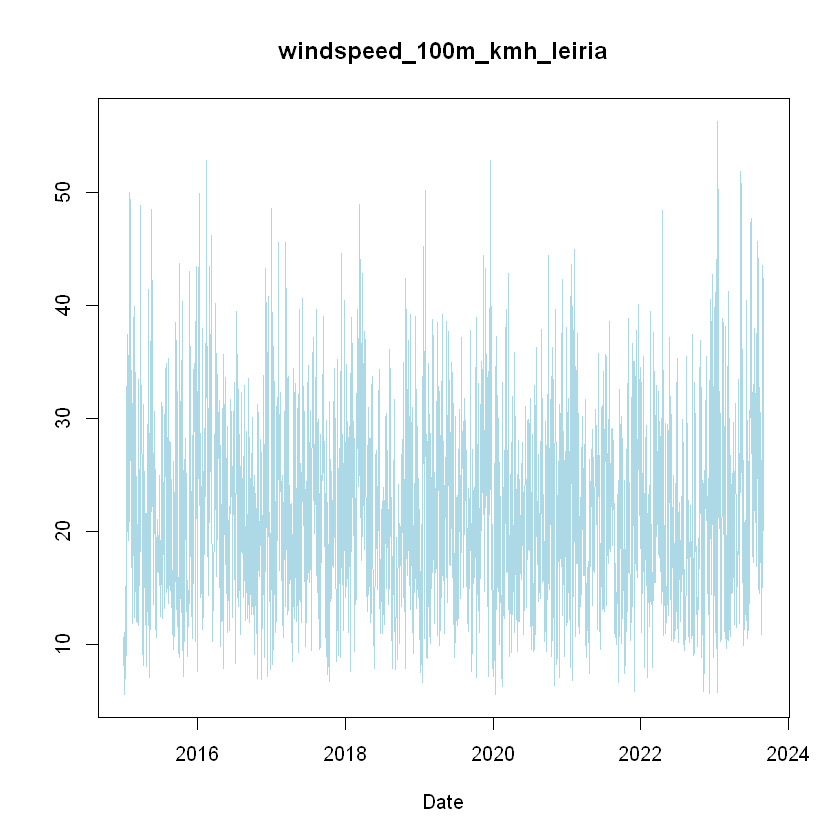

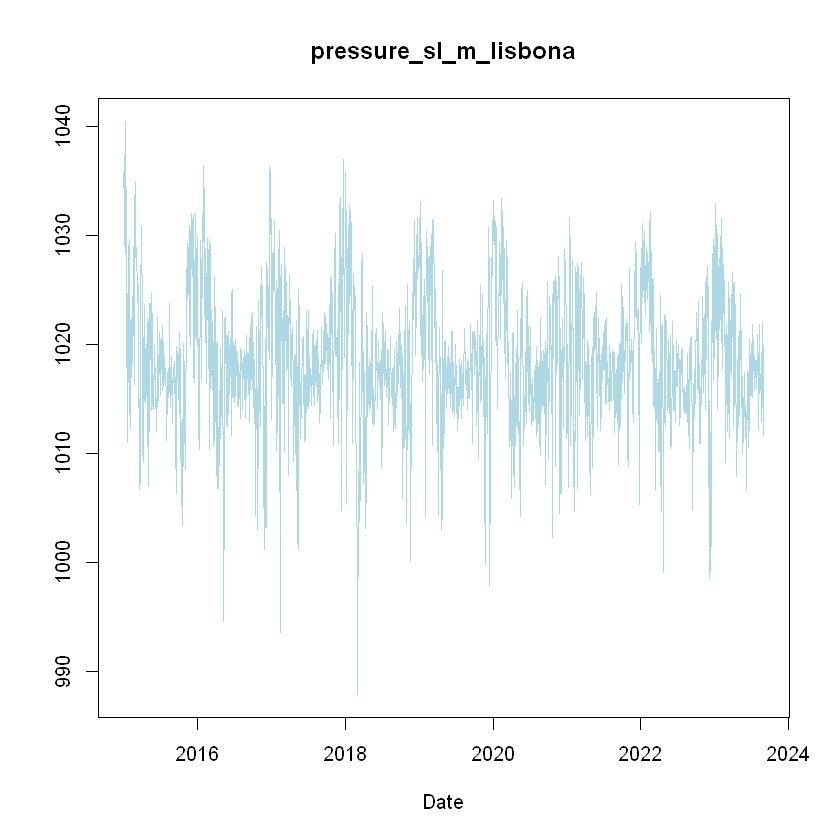

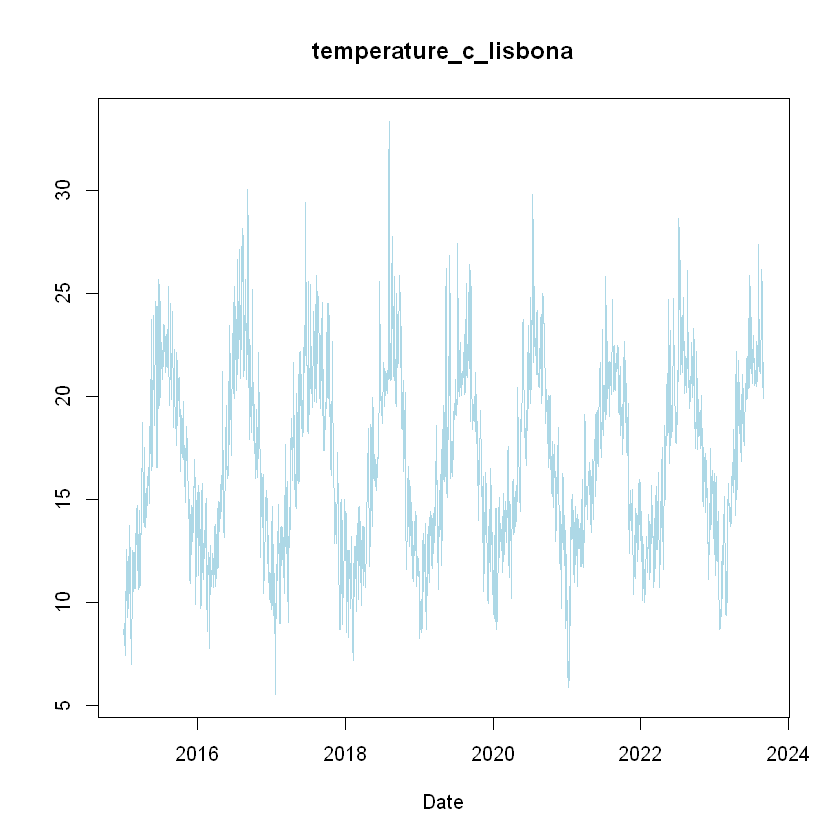

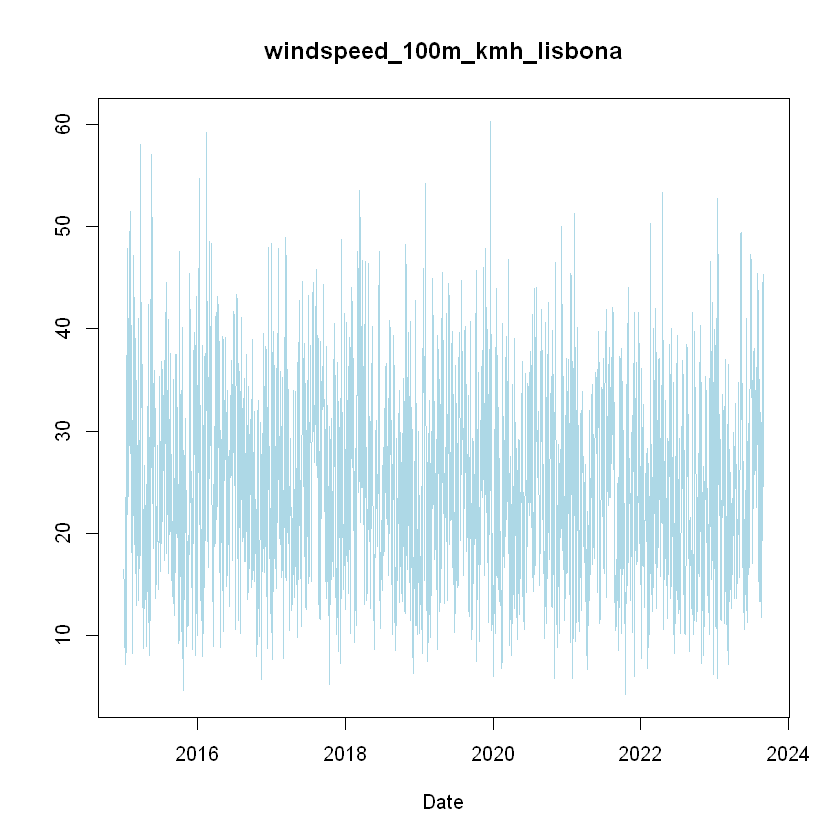

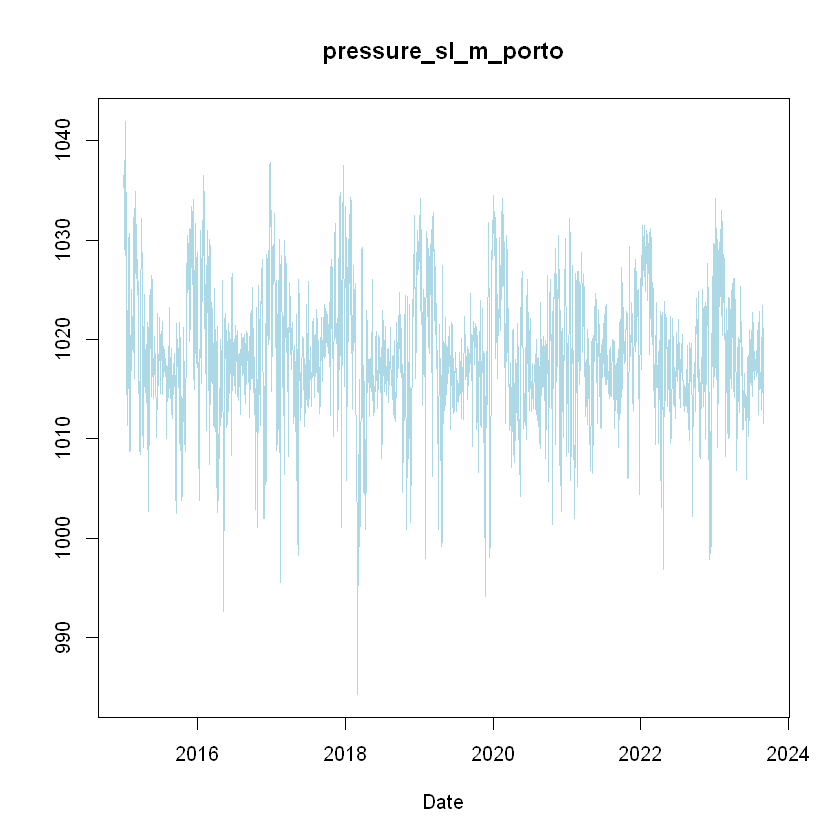

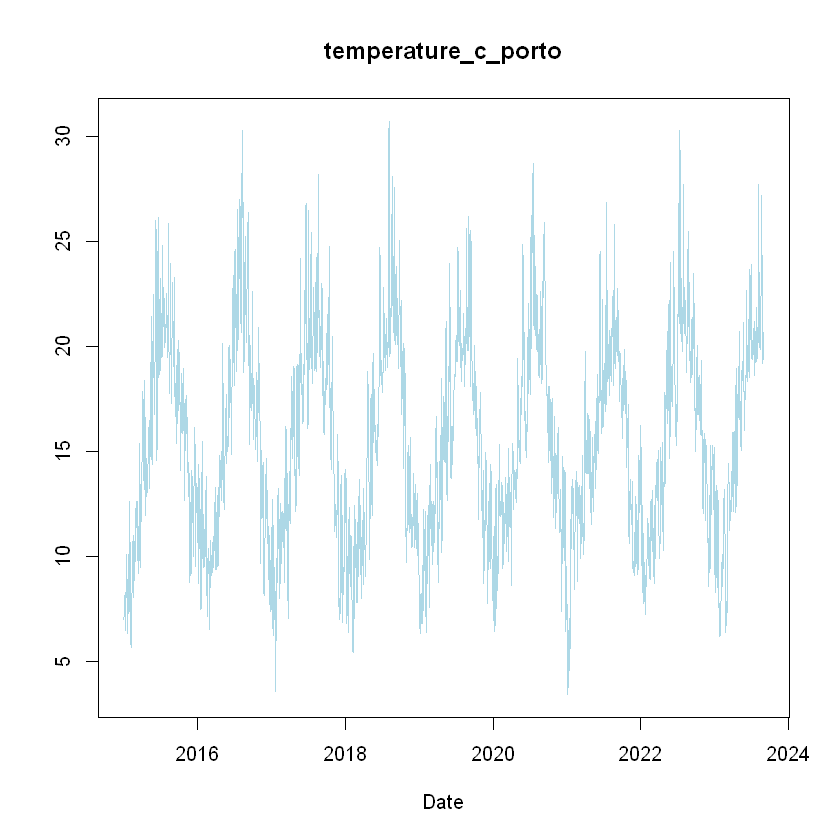

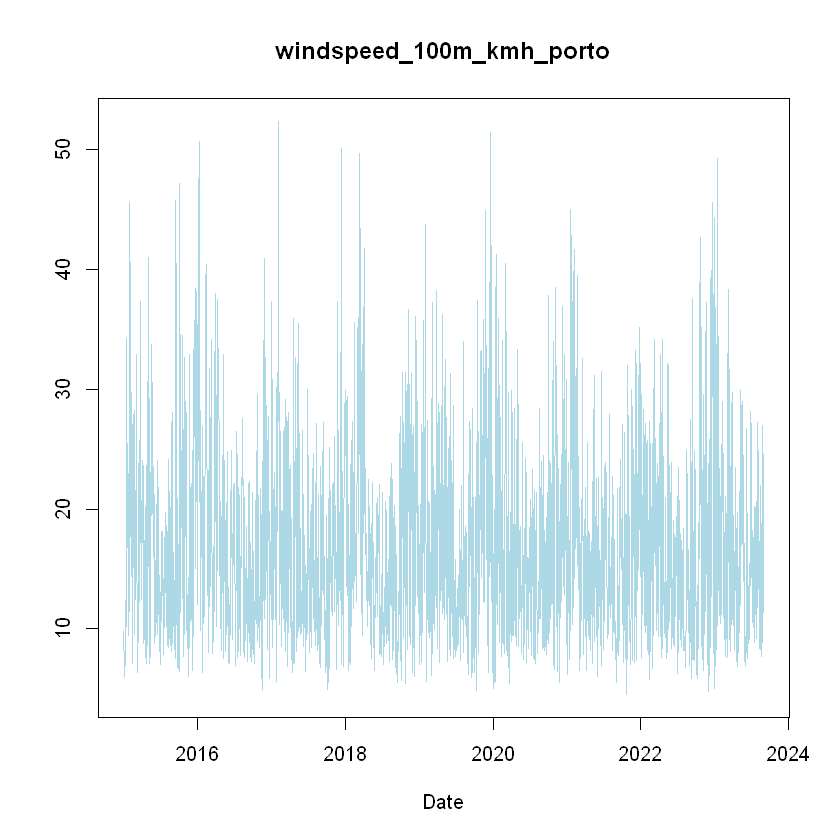

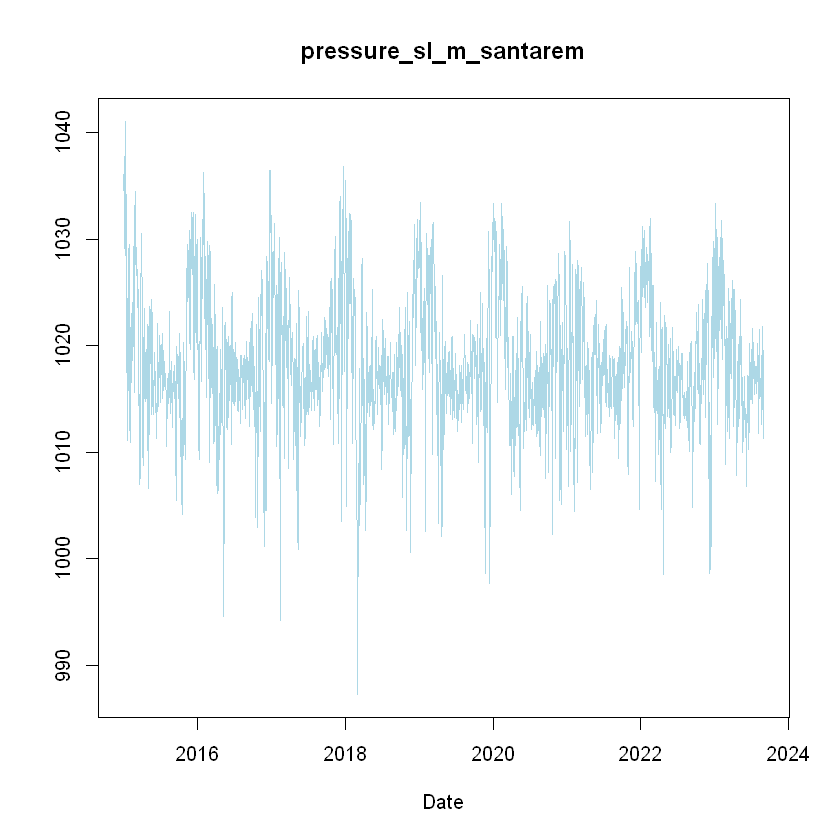

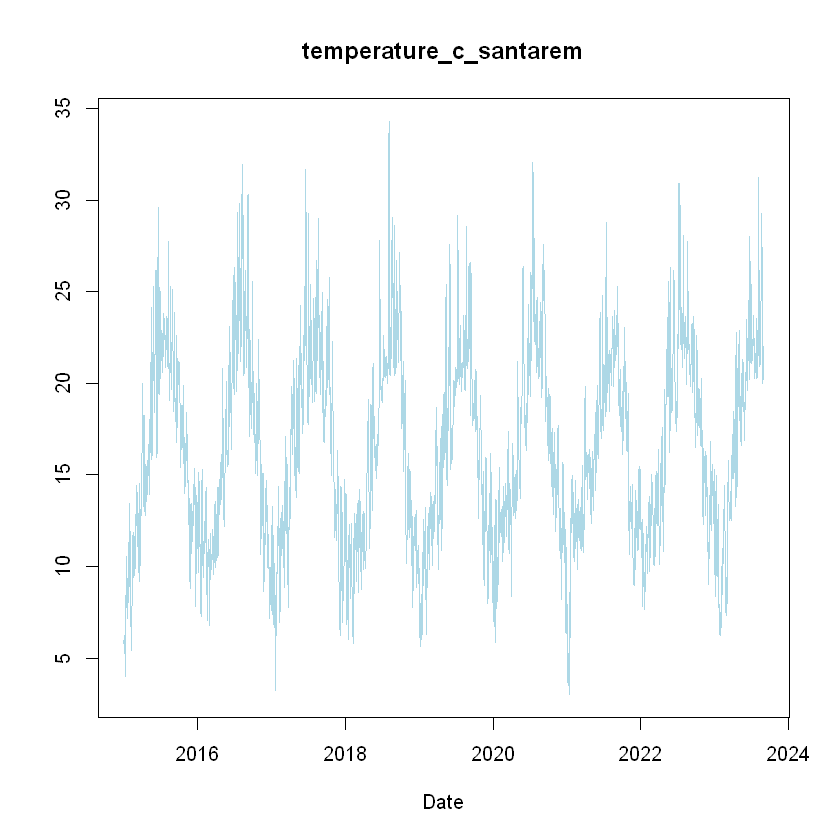

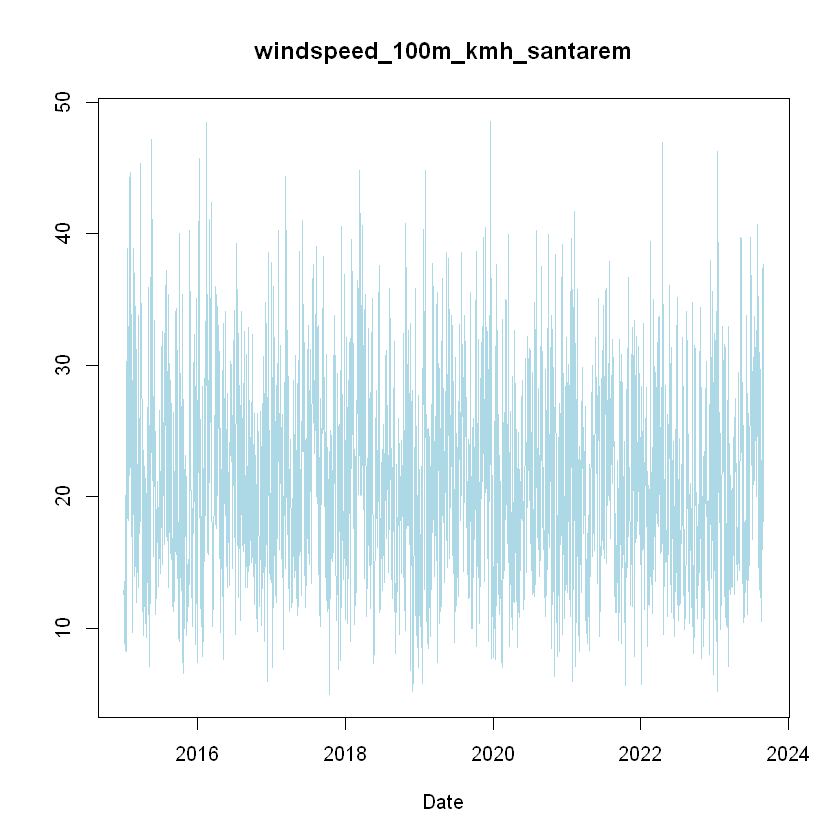

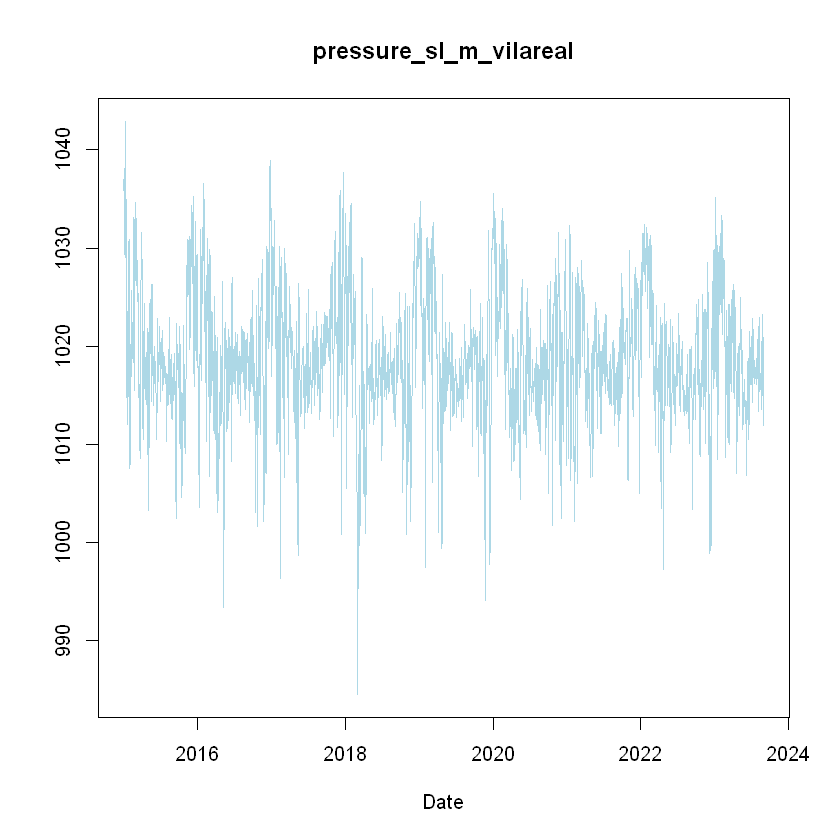

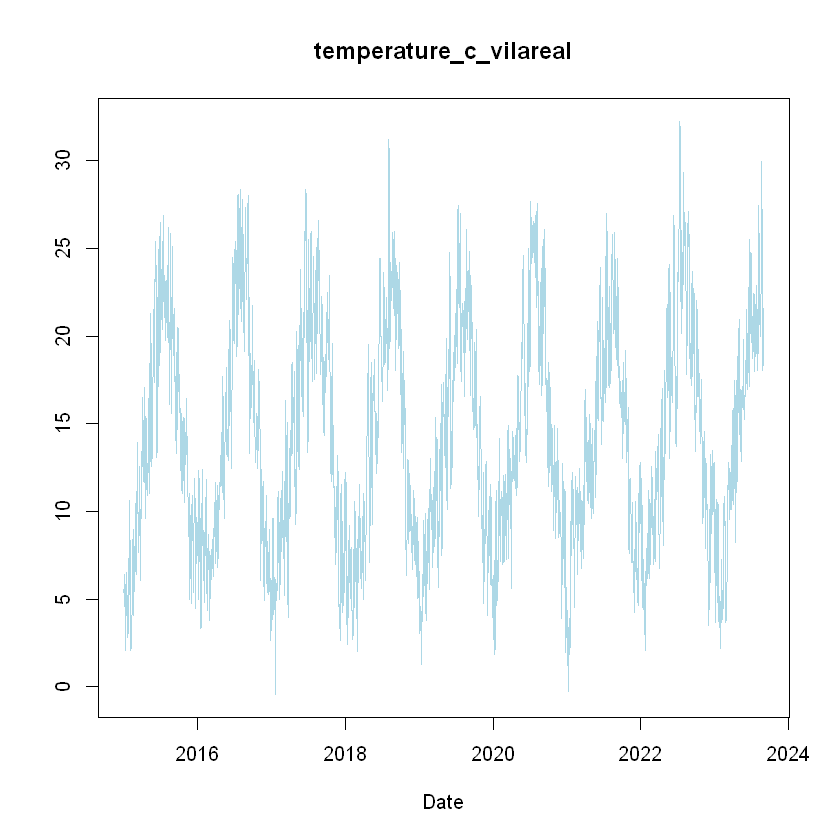

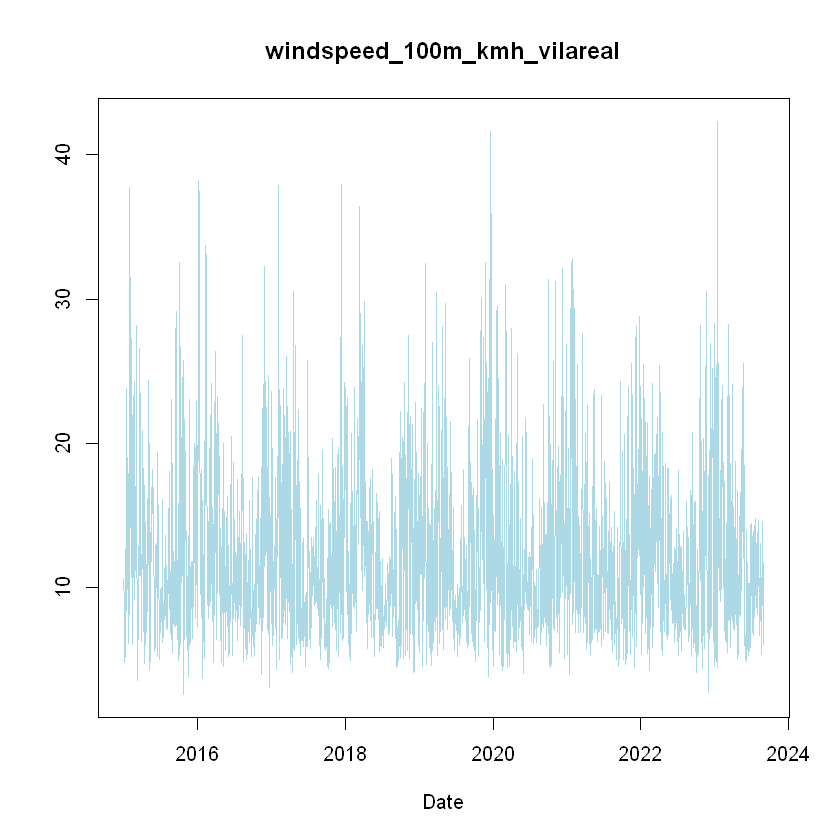

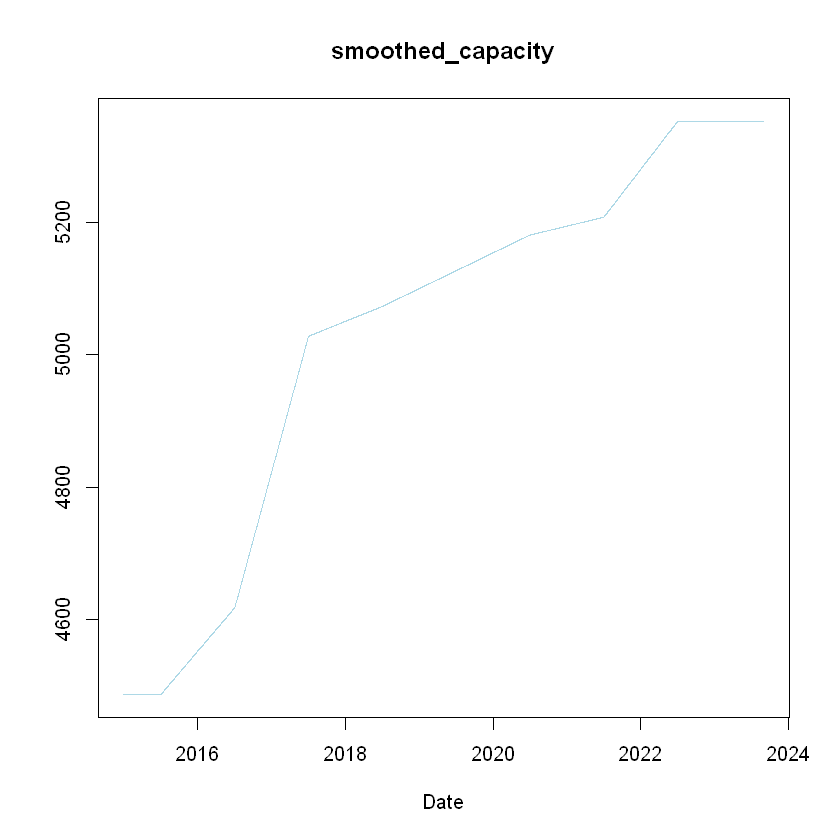

In [7]:
for (covar in names(covariates)[-1]) {  
    tmp <- ts(covariates[[covar]], frequency = 365.25, start=c(2015, 01, 01))
    ts.plot(tmp, col=c("lightblue"), main = covar, ylab = "", xlab = "Date")
    }

In [8]:
dir.create(file.path(dirname(folder), "data/final_covariates"))
write.csv(covariates, file=file.path(dirname(folder), "data/final_covariates/covariates_2015_2023.csv"), row.names = FALSE)